# Module 6 Section 1 Lab 1 - K-Nearest Neighbors
*k-Nearest Neighbors* (k-NN) Marupakan salah satu algoritma *supervised learning* dimana hasil dari *instance* yang baru diklasifikasikan berdasarkan mayoritas dari kategori $k$-tetangga terdekat. k-NN termasuk metode *Lazy learning* hanya menyimpan contoh proses pelatihan dan menunda generalisasi (membangun model) hingga *instance* baru harus diklasifikasikan atau dibuat prediksinya. k-NN dapat digunakan untuk tugas klasifikasi dan regresi. k-NN adalah pengklasifikasi berbasis jarak, artinya secara implisit mengasumsikan bahwa semakin kecil jarak antara 2 titik, semakin mirip mereka.

KNN memiliki langkah-langkah dasar berikut:
1. Tentukan nilai $k$. Penentuan nilai ini bergantung dari sebara data. Jika sebaran data rapat dan memiliki *outliers*, maka pilih nilai $k$ yang kecil. Sedangkan jika sebaran data lebar, maka lebih baik memilih nilai $k$ yang besar.
2. Hitung jarak.
3. Temukan tetangga terdekat. Misalnya, kita menentukan $k=5$. Kita perlu menemukan 5 tetangga terdekat terhadap titik data baru berdasarkan *Euclidean Distance*. 
4. Lakukan voting. Hitung berapa jumlah data dari masing-masing kategori yang menjadi tetangga (neighbor) titik data baru.
5. Klasifikasikan. Masukkan titik data baru ke kategori dengan jumlah data (yang menjadi tetangga titik data baru) terbanyak.

<center><img src='https://github.com/ksnugroho/ai-mastery/blob/main/assets/steps-of-knn.png?raw=true' width=600></img></center>

## Menentukan Nilai K yang Optimal
- Tidak ada metode statistik untuk menemukan nilai $k$ yang paling optimal.
- Inisialisasi nilai $k$ secara acak dan mulai komputasi.
- Memilih nilai $k$ yang kecil menyebabkan batas keputusan yang tidak stabil.
- Buat grafik antara tingkat kesalahan dan $k$ yang menunjukkan nilai dalam rentang yang ditentukan. Kemudian pilih nilai $k$ yang memiliki tingkat kesalahan minimum.

## Proses Fitting Model
k-NN unik dibandingkan dengan algoritma lain karena hampir tidak melakukan apa pun selama langkah proses 'fit', dan semua pekerjaan selama langkah 'prediksi'. Selama langkah 'fit', k-NN hanya menyimpan semua data pelatihan dan nilai yang sesuai. Tidak ada jarak yang dihitung pada titik ini.

## Proses Voting
Cara memutuskan voting:
- Saat melakukan klasifikasi biner, sering gunakan nilai $k$ ganjil untuk menghindari kebingungan menentukan hasilnya.
- Untuk masalah klasifikasi multiclass, kurangi $k$ sebanyak 1 untuk melihat siapa yang menang. Ingat ya, bobot suara berdasarkan jarak tetangga.

## Notasi
Dalam ruang dua dimensi, koordinat diberikan sebagai titik pada sumbu x dan y adalah:

$$d=\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$$

<center><img src='https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/assets/euclidean-distance.png'></img></center>








In [46]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
X = data.iloc[:,:-1]
y = data.iloc[:,8:]

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape

((576, 8), (192, 8))

In [49]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
711,5,126,78,27,22,29.6,0.439,40
659,3,80,82,31,70,34.2,1.292,27
223,7,142,60,33,190,28.8,0.687,61
90,1,80,55,0,0,19.1,0.258,21
536,0,105,90,0,0,29.6,0.197,46
...,...,...,...,...,...,...,...,...
442,4,117,64,27,120,33.2,0.230,24
726,1,116,78,29,180,36.1,0.496,25
670,6,165,68,26,168,33.6,0.631,49
99,1,122,90,51,220,49.7,0.325,31


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [51]:
X_train

array([[ 0.36746228,  0.15350011,  0.46447158, ..., -0.34682376,
        -0.11114067,  0.58743796],
       [-0.23900842, -1.27808701,  0.68162713, ...,  0.24231859,
         2.35695073, -0.51417372],
       [ 0.97393299,  0.65144346, -0.51272837, ..., -0.4492833 ,
         0.6064287 ,  2.36696453],
       ...,
       [ 0.67069763,  1.36723702, -0.07841728, ...,  0.16547393,
         0.4443969 ,  1.35009221],
       [-0.84547912,  0.02901428,  1.11593822, ...,  2.22747216,
        -0.4409911 , -0.17521628],
       [-0.84547912, -0.40668615, -0.51272837, ...,  0.40881534,
        -0.18058286, -0.76839181]])

In [108]:
'''
Classifier implementing the k-nearest neighbors vote.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel())

y_pred = knn.predict(X_test)

print('Akurasi pada data uji', accuracy_score(y_test, y_pred), '\n')
print('Classification report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Akurasi pada data uji 0.6875 

Classification report
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       118
           1       0.61      0.53      0.57        74

    accuracy                           0.69       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.68      0.69      0.68       192

Confusion Matrix
 [[93 25]
 [35 39]]


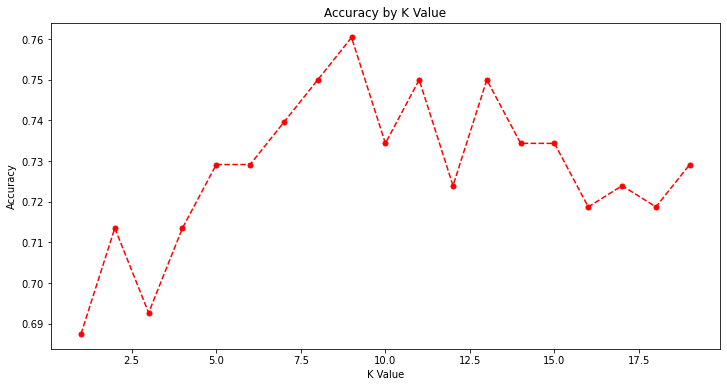

In [96]:
# Mencari nilai K optimal berdasarkan akurasi

k_range = list(range(1, 20))
k_acc = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())

    y_pred= knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    k_acc.append(score)

import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_acc, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Accuracy by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 
plt.show()

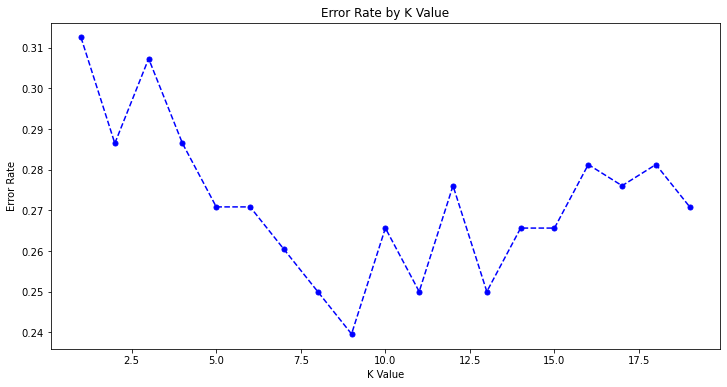

In [109]:
# Mencari nilai K optimal berdasarkan error rate (kesalahan klasifikasi)

error_rate = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train.values.ravel())

  y_pred = knn.predict(X_test)
  y_pred = y_pred.reshape(len(X_test),1)
  error_rate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(12, 6))  
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Error Rate by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Error Rate') 
plt.show()

In [107]:
# Retrain dengan nilai K Baru

knn_new = KNeighborsClassifier(n_neighbors=9)
knn_new.fit(X_train, y_train.values.ravel())

y_pred_new = knn_new.predict(X_test)

print('Akurasi pada data uji', accuracy_score(y_test, y_pred_new), '\n')
print('Classification report\n', classification_report(y_test, y_pred_new))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_new))

Akurasi pada data uji 0.7604166666666666 

Classification report
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       118
           1       0.74      0.58      0.65        74

    accuracy                           0.76       192
   macro avg       0.76      0.73      0.73       192
weighted avg       0.76      0.76      0.75       192

Confusion Matrix
 [[103  15]
 [ 31  43]]
